# Self-Driving Car Engineer Nanodegree
## Deep Learning
### Project: Build a Traffic Sign Recognition Classifier

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "../input/train.p"
validation_file="../input/valid.p"
testing_file = "../input/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import random
import matplotlib.pyplot as plt

# Number of training examples
n_train = len(X_train);

# Number of testing examples.
n_test = len(X_test);

# What's the shape of an traffic sign image?
image_shape = train['sizes'][0];

# How many unique classes/labels there are in the dataset.
n_classes =max(y_train);

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = [26 25]
Number of classes = 42


In [3]:
import scipy.misc
i_width = 32
i_height = 32

for img in X_train:
    img = scipy.misc.imresize(img, (i_height, i_width))
for img in X_test:
    img = scipy.misc.imresize(img, (i_height, i_width))
for img in X_valid:
    img = scipy.misc.imresize(img, (i_height, i_width))

In [4]:
# Augment training data

from scipy.ndimage import rotate
from scipy.misc import face
from matplotlib import pyplot as plt
import numpy as np

X_train_rot=[];
y_train_rot=[];
n_train = len(X_train);
print (n_train)
for d in range(-20,20,5):
    if (d==0): 
        continue
    for ind in range(0,n_train):
        rot = rotate(X_train[ind], d, reshape=False)
        X_train_rot.append(rot);
        y_train_rot.append(y_train[ind])
        #fig, ax = plt.subplots(1, 1)
        #ax.imshow(rot)
        #ax[0].imshow(rot)
        

X_train = np.concatenate((X_train,X_train_rot),axis=0);
y_train = np.concatenate((y_train,y_train_rot),axis=0);

print (len(X_train))

34799
278392


30


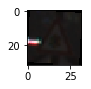

In [5]:
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train_rot))
image = X_train_rot[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train_rot[index])

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

### Obtain a Basic Summary of the Data

In [36]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import random
import matplotlib.pyplot as plt

# Number of training examples
n_train = len(X_train);

# Number of testing examples.
n_test = len(X_test);

# What's the shape of an traffic sign image?
image_shape = train['sizes'][0];

# How many unique classes/labels there are in the dataset.
n_classes =max(y_train);

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 278392
Number of testing examples = 12630
Image data shape = [26 25]
Number of classes = 42


### Include an exploratory visualization of the dataset

34


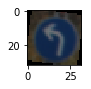

In [7]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

In [8]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

for img in X_train:
    img = (img-128.0)/128.0
for img in X_test:
    img = (img-128.0)/128.0
for img in X_valid:
    img = (img-128.0)/128.0

X_train, y_train = shuffle(X_train, y_train)


In [9]:
# Balance the dataset
unique, counts = np.unique(y_train, return_counts=True)
print(unique,counts)
limit = np.min(counts)
print (limit)
count = counts*0;
new_X_train=[];
new_y_train=[];
for ind in range(0,n_train):
    i=y_train[ind]
    if (count[i]<limit):
        new_X_train.append(X_train[ind])
        new_y_train.append(y_train[ind])
        count[i]+=1
#X_train=new_X_train
#y_train=new_y_train

print ('New counts')
unique, counts = np.unique(new_y_train, return_counts=True)
print(unique,counts)
print('Old training dataset size ',n_train)
n_train = len(new_X_train);
print('New training dataset size ',n_train)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42] [ 1440 15840 16080 10080 14160 13200  2880 10320 10080 10560 14400  9360
 15120 15360  5520  4320  2880  7920  8640  1440  2400  2160  2640  3600
  1920 10800  4320  1680  3840  1920  3120  5520  1680  4792  2880  8640
  2640  1440 14880  2160  2400  1680  1680]
1440
New counts
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42] [1440 1440 1440 1440 1440 1440 1440 1440 1440 1440 1440 1440 1440 1440 1440
 1440 1440 1440 1440 1440 1440 1440 1440 1440 1440 1440 1440 1440 1440 1440
 1440 1440 1440 1440 1440 1440 1440 1440 1440 1440 1440 1440 1440]
Old training dataset size  278392
New training dataset size  61920


### Model Architecture

In [23]:
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 2048
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def ConvNet(x,dropout_keep=1.):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.05
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Dropout
    #conv1 = tf.nn.dropout(conv1,dropout_keep)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    
    # Dropout
    #conv2 = tf.nn.dropout(conv2,dropout_keep)
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Flatten. Input = 5x5x16. Output = 1176.
    #fc01   = flatten(conv1)
    
    #fc0 = flatten(tf.concat([fc00,fc01],0));
    
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 200), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(200))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    # Dropout
    fc1 = tf.nn.dropout(fc1,dropout_keep)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(200, 120), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(120))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    # Dropout
    fc2 = tf.nn.dropout(fc2,dropout_keep)
    
    # Layer 5: Fully Connected. Input = 84. Output = n_classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(120, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [24]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
d = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

In [25]:
# Defining the training steps

dropout=0.5
rate = 0.0001 #0.00001
logits = ConvNet(x,d)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


In [26]:
# Define evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, d:1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [27]:
# Running training
print("...")
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, d: dropout})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        saver.save(sess, './convnet')
    #saver.save(sess, './convnet')
    print("Model saved")

...
Training...

EPOCH 1 ...
Validation Accuracy = 0.321

EPOCH 2 ...
Validation Accuracy = 0.456

EPOCH 3 ...
Validation Accuracy = 0.589

EPOCH 4 ...
Validation Accuracy = 0.691

EPOCH 5 ...
Validation Accuracy = 0.773

EPOCH 6 ...
Validation Accuracy = 0.813

EPOCH 7 ...
Validation Accuracy = 0.839

EPOCH 8 ...
Validation Accuracy = 0.862

EPOCH 9 ...
Validation Accuracy = 0.871

EPOCH 10 ...
Validation Accuracy = 0.882

EPOCH 11 ...
Validation Accuracy = 0.893

EPOCH 12 ...
Validation Accuracy = 0.896

EPOCH 13 ...
Validation Accuracy = 0.905

EPOCH 14 ...
Validation Accuracy = 0.909

EPOCH 15 ...
Validation Accuracy = 0.912

EPOCH 16 ...
Validation Accuracy = 0.915

EPOCH 17 ...
Validation Accuracy = 0.917

EPOCH 18 ...
Validation Accuracy = 0.922

EPOCH 19 ...
Validation Accuracy = 0.921

EPOCH 20 ...
Validation Accuracy = 0.927

EPOCH 21 ...
Validation Accuracy = 0.927

EPOCH 22 ...
Validation Accuracy = 0.927

EPOCH 23 ...
Validation Accuracy = 0.932

EPOCH 24 ...
Validation Ac

In [35]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    train_accuracy = evaluate(X_train, y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))

Test Accuracy = 0.923
Train Accuracy = 0.979


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [29]:
# Download images
import urllib.request
res=urllib.request.urlretrieve("http://i.imgur.com/pbuCP3Q.jpg","/tmp/1.jpg")#11
res=urllib.request.urlretrieve("http://i.imgur.com/Hp4xLhL.jpg","/tmp/11.jpg")#1
res=urllib.request.urlretrieve("http://i.imgur.com/bDTDXyT.jpg","/tmp/14.jpg")#14
res=urllib.request.urlretrieve("http://i.imgur.com/KZhOHLf.jpg","/tmp/18.jpg")#18
res=urllib.request.urlretrieve("http://i.imgur.com/PLf6iKG.jpg","/tmp/40.jpg")#40
#res=urllib.request.urlretrieve("http://i.imgur.com/zs1c05c.jpg","/tmp/36.jpg")#36

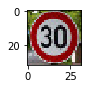

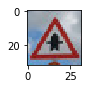

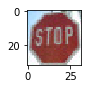

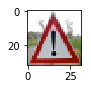

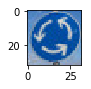

In [30]:
### Load the images and plot them here.
import os
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
%matplotlib inline
img1=pltimg.imread('/tmp/1.jpg')
plt.figure(figsize=(1,1))
plt.imshow(img1)
img2=pltimg.imread('/tmp/11.jpg')
plt.figure(figsize=(1,1))
plt.imshow(img2)
img3=pltimg.imread('/tmp/14.jpg')
plt.figure(figsize=(1,1))
plt.imshow(img3)
img4=pltimg.imread('/tmp/18.jpg')
plt.figure(figsize=(1,1))
plt.imshow(img4)
img5=pltimg.imread('/tmp/40.jpg')
plt.figure(figsize=(1,1))
plt.imshow(img5)

### Predict the Sign Type for Each Image

In [31]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
X_new_test=[img1,img2,img3,img4,img5];
y_new_test=[1,11,14,18,40];

### Analyze Performance

In [32]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_new_test, y_new_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [33]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    lgts = sess.run(logits, feed_dict={x: X_new_test, d:1.})
    sm = tf.nn.softmax(lgts)
    top_five = sess.run(tf.nn.top_k(sm, k=5))
    print("Top five categories")
    print(top_five)


Top five categories
TopKV2(values=array([[  9.99998093e-01,   1.85576744e-06,   4.67365062e-08,
          4.57043603e-09,   9.28936355e-12],
       [  1.00000000e+00,   2.54907040e-10,   2.16431774e-17,
          2.41319759e-19,   4.55797619e-25],
       [  9.99618411e-01,   1.93382846e-04,   1.55978400e-04,
          1.66057853e-05,   8.68146708e-06],
       [  9.99993205e-01,   5.84998543e-06,   9.19054344e-07,
          1.49792857e-13,   1.39308382e-17],
       [  9.99998689e-01,   1.32381410e-06,   3.30580138e-12,
          9.41817371e-13,   6.10798359e-13]], dtype=float32), indices=array([[ 1,  0,  2,  4,  5],
       [11, 30, 21, 27, 23],
       [14, 15, 29,  3,  1],
       [18, 26, 27, 24, 11],
       [40, 38, 41, 39, 36]], dtype=int32))
